In [1]:
#importing Libraries
import requests
import lxml.html as lh
import bs4 as bs
import urllib.request
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

#Getting the data from url
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
res = requests.get(url)
soup = bs.BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[0]
df = pd.read_html(str(table))
data = pd.read_json(df[0].to_json(orient='records'))

In [3]:
#First 5 rows of data frame
data.head()

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [4]:
# removing assigned value from borough coloumn
raw_data_selected = data[data['Borough'] != 'Not assigned']


In [5]:
#Grouping Data with the help of postcode
raw_data_selected = raw_data_selected.groupby(['Borough', 'Postal Code'], as_index=False).agg(','.join)
raw_data_selected.head()

,Borough,Postal Code,Neighbourhood
0,Central Toronto,M4N,Lawrence Park
1,Central Toronto,M4P,Davisville North
2,Central Toronto,M4R,"North Toronto West, Lawrence Park"
3,Central Toronto,M4S,Davisville
4,Central Toronto,M4T,"Moore Park, Summerhill East"


In [6]:
#Replacing values of not assigned in Neighbourhood field with Borough
raw_data_selected['Neighbourhood'] = np.where(raw_data_selected['Neighbourhood'] == 'Not assigned', raw_data_selected['Borough'], raw_data_selected['Neighbourhood'])

In [7]:
# finding the Shape of Data
raw_data_selected.shape

(103, 3)

In [8]:
geospatial_url = "https://cocl.us/Geospatial_data"
geospatial_data = pd.read_csv(geospatial_url)

In [9]:
geospatial_data.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [10]:
data = pd.merge(raw_data_selected, geospatial_data, on='Postal Code')
data.head()

,Borough,Postal Code,Neighbourhood,Latitude,Longitude
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197
2,Central Toronto,M4R,"North Toronto West, Lawrence Park",43.715383,-79.405678
3,Central Toronto,M4S,Davisville,43.704324,-79.388790
4,Central Toronto,M4T,"Moore Park, Summerhill East",43.689574,-79.383160


In [11]:
data['Coordinates'] = list(zip(data['Latitude'], data['Longitude']))
data.head(70)

,Borough,Postal Code,Neighbourhood,Latitude,Longitude,Coordinates
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790,"(43.7280205, -79.3887901)"
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197,"(43.7127511, -79.3901975)"
2,Central Toronto,M4R,"North Toronto West, Lawrence Park",43.715383,-79.405678,"(43.7153834, -79.40567840000001)"
3,Central Toronto,M4S,Davisville,43.704324,-79.388790,"(43.7043244, -79.3887901)"
4,Central Toronto,M4T,"Moore Park, Summerhill East",43.689574,-79.383160,"(43.6895743, -79.38315990000001)"
...,...,...,...,...,...,...
65,North York,M3L,Downsview,43.739015,-79.506944,"(43.7390146, -79.5069436)"
66,North York,M3M,Downsview,43.728496,-79.495697,"(43.7284964, -79.49569740000001)"
67,North York,M3N,Downsview,43.761631,-79.520999,"(43.7616313, -79.52099940000001)"
68,North York,M4A,Victoria Village,43.725882,-79.315572,"(43.725882299999995, -79.31557159999998)"


In [12]:
data.isnull().sum()

Borough          0
Postal Code      0
Neighbourhood    0
Latitude         0
Longitude        0
Coordinates      0
dtype: int64

In [13]:
x=data[['Latitude','Longitude']]

In [14]:
import matplotlib.pyplot as plt

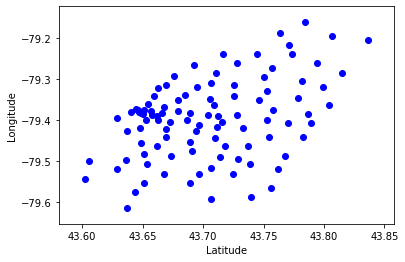

In [15]:
plt.scatter(x['Latitude'],x['Longitude'],c='blue')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

# map of 103 negibourhoods


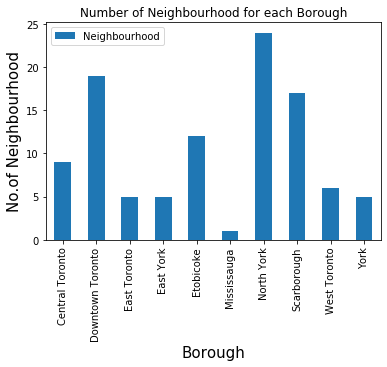

In [16]:
# title
plt.title('Number of Neighbourhood for each Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighbourhood', fontsize=15)
#giving a bar plot
data.groupby('Borough')['Neighbourhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

#### From the above Bar Plot, we can see that north york has highest number of neighborhoods.


In [17]:
from geopy.geocoders import Nominatim 
import geocoder

In [18]:
CLIENT_ID = 'EIHW4ACRSTI31VBB02XCL0DEOJZX0BV3YN0UNLPXBBQCKBMX' # my Foursquare ID
CLIENT_SECRET = 'LHO0VUVORPGNSD1DHAVQCRO4KVCJTQIO4IQIC1OPGLGK41UM' # my Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: '+CLIENT_ID)
print('CLIENT_SECRET: '+CLIENT_SECRET)

Your credentails:
CLIENT_ID: EIHW4ACRSTI31VBB02XCL0DEOJZX0BV3YN0UNLPXBBQCKBMX
CLIENT_SECRET: LHO0VUVORPGNSD1DHAVQCRO4KVCJTQIO4IQIC1OPGLGK41UM


In [20]:
radius = 700 
LIMIT = 100
latitude_n1=43.773077
longitude_n1=-79.257774
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude_n1, 
   longitude_n1, 
    radius, 
   LIMIT)
results = requests.get(url).json()

In [21]:
from pandas.io.json import json_normalize 
venues=results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.columns

Index(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 'venue.location.address', 'venue.location.crossStreet',
       'venue.location.lat', 'venue.location.lng',
       'venue.location.labeledLatLngs', 'venue.location.distance',
       'venue.location.postalCode', 'venue.location.cc', 'venue.location.city',
       'venue.location.state', 'venue.location.country',
       'venue.location.formattedAddress', 'venue.categories',
       'venue.photos.count', 'venue.photos.groups',
       'venue.location.neighborhood', 'venue.venuePage.id'],
      dtype='object')

In [22]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [23]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues.head()

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,SEPHORA,"[{'id': '4bf58dd8d48988d10c951735', 'name': 'C...",43.775017,-79.258109
1,Disney Store,"[{'id': '4bf58dd8d48988d1f3941735', 'name': 'T...",43.775537,-79.256833
2,American Eagle Store,"[{'id': '4bf58dd8d48988d103951735', 'name': 'C...",43.776012,-79.258334
3,DAVIDsTEA,"[{'id': '4bf58dd8d48988d1dc931735', 'name': 'T...",43.776320,-79.258688
4,Hot Topic,"[{'id': '4bf58dd8d48988d103951735', 'name': 'C...",43.775450,-79.257929


In [24]:
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(5)

,name,categories,lat,lng
0,SEPHORA,Cosmetics Shop,43.775017,-79.258109
1,Disney Store,Toy / Game Store,43.775537,-79.256833
2,American Eagle Store,Clothing Store,43.776012,-79.258334
3,DAVIDsTEA,Tea Room,43.776320,-79.258688
4,Hot Topic,Clothing Store,43.775450,-79.257929


In [25]:
a=pd.Series(nearby_venues.categories)
a.value_counts()[:10]

Clothing Store         10
Coffee Shop             5
Restaurant              4
Pharmacy                2
Sandwich Place          2
Tea Room                2
Gas Station             2
Department Store        1
Sporting Goods Shop     1
Greek Restaurant        1
Name: categories, dtype: int64

In [26]:
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # making GET request
        venue_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [34]:
central_toronto_venues = getNearbyVenues(names=data['Neighbourhood'],
                                   latitudes=data['Latitude'],
                                   longitudes=data['Longitude']
                                  )

Lawrence Park
Davisville North
North Toronto West, Lawrence Park
Davisville
Moore Park, Summerhill East
Summerhill West, Rathnelly, South Hill, Forest Hill SE, Deer Park
Roselawn
Forest Hill North & West, Forest Hill Road Park
The Annex, North Midtown, Yorkville
Rosedale
St. James Town, Cabbagetown
Church and Wellesley
Regent Park, Harbourfront
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Richmond, Adelaide, King
Harbourfront East, Union Station, Toronto Islands
Toronto Dominion Centre, Design Exchange
Commerce Court, Victoria Hotel
University of Toronto, Harbord
Kensington Market, Chinatown, Grange Park
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport
Stn A PO Boxes
First Canadian Place, Underground city
Christie
Queen's Park, Ontario Provincial Government
The Beaches
The Danforth West, Riverdale
India Bazaar, The Beaches West
Studio District
Business reply mail Processing Centre, South Central Letter 

In [35]:
print('There are {} Uniques Categories.'.format(len(central_toronto_venues['Venue Category'].unique())))
central_toronto_venues.groupby('Neighbourhood').count().head()

There are 317 Uniques Categories.


,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
Agincourt,7,7,7,7,7,7
"Alderwood, Long Branch",9,9,9,9,9,9
"Bathurst Manor, Wilson Heights, Downsview North",22,22,22,22,22,22
Bayview Village,7,7,7,7,7,7
"Bedford Park, Lawrence Manor East",31,31,31,31,31,31


In [36]:
# one hot encoding
central_toronto_onehot = pd.get_dummies(central_toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
central_toronto_onehot['Neighbourhood'] = central_toronto_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [central_toronto_onehot.columns[-1]] + list(central_toronto_onehot.columns[:-1])
central_toronto_onehot = central_toronto_onehot[fixed_columns]
central_toronto_grouped = central_toronto_onehot.groupby('Neighbourhood').mean().reset_index()
central_toronto_onehot.head(5)

,Neighbourhood,Accessories Store,Afghan Restaurant,African Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Lawrence Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Lawrence Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Lawrence Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lawrence Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Davisville North,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
num_top_venues = 5
for hood in central_toronto_grouped['Neighbourhood']:
    print("---- "+hood+" ----")
    temp =central_toronto_grouped[central_toronto_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Agincourt ----
             venue  freq
0  Badminton Court  0.14
1   Breakfast Spot  0.14
2       Restaurant  0.14
3        Pool Hall  0.14
4     Skating Rink  0.14


---- Alderwood, Long Branch ----
               venue  freq
0  Convenience Store  0.22
1        Pizza Place  0.22
2                Pub  0.11
3        Gas Station  0.11
4        Coffee Shop  0.11


---- Bathurst Manor, Wilson Heights, Downsview North ----
              venue  freq
0       Coffee Shop  0.09
1              Bank  0.09
2              Park  0.09
3  Sushi Restaurant  0.05
4     Shopping Mall  0.05


---- Bayview Village ----
                venue  freq
0                Bank  0.29
1  Chinese Restaurant  0.14
2                Café  0.14
3        Skating Rink  0.14
4       Grocery Store  0.14


---- Bedford Park, Lawrence Manor East ----
                venue  freq
0  Italian Restaurant  0.10
1         Coffee Shop  0.10
2          Restaurant  0.06
3      Sandwich Place  0.06
4        Cupcake Shop  0.03


---- 

                  venue  freq
0   Japanese Restaurant  0.11
1                  Bank  0.11
2  Caribbean Restaurant  0.11
3                   Bar  0.11
4  Fast Food Restaurant  0.11


---- Old Mill South, King's Mill Park, Sunnylea, Humber Bay, Mimico NE, The Queensway East, Royal York South East, Kingsway Park South East ----
                        venue  freq
0                  Playground  0.33
1  Construction & Landscaping  0.33
2              Baseball Field  0.33
3                Neighborhood  0.00
4             Organic Grocery  0.00


---- Parkdale, Roncesvalles ----
            venue  freq
0            Café  0.06
1  Breakfast Spot  0.06
2     Pizza Place  0.04
3    Gourmet Shop  0.04
4     Coffee Shop  0.04


---- Parkview Hill, Woodbine Gardens ----
                  venue  freq
0           Pizza Place  0.15
1               Brewery  0.08
2  Gym / Fitness Center  0.08
3        Breakfast Spot  0.08
4             Gastropub  0.08


---- Parkwoods ----
               venue  freq
0    

In [38]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [39]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = central_toronto_grouped['Neighbourhood']

for ind in np.arange(central_toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(central_toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Pool Hall,Badminton Court,Breakfast Spot,Restaurant,Latin American Restaurant,Skating Rink,Lounge,Yoga Studio,Dumpling Restaurant,Dog Run
1,"Alderwood, Long Branch",Convenience Store,Pizza Place,Gas Station,Pub,Coffee Shop,Gym,Sandwich Place,Yoga Studio,Donut Shop,Discount Store
2,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Park,Sandwich Place,Ice Cream Shop,Mobile Phone Shop,Bridal Shop,Supermarket,Sushi Restaurant,Shopping Mall
3,Bayview Village,Bank,Grocery Store,Café,Japanese Restaurant,Skating Rink,Chinese Restaurant,Dive Bar,Dog Run,Doner Restaurant,Donut Shop
4,"Bedford Park, Lawrence Manor East",Italian Restaurant,Coffee Shop,Restaurant,Sandwich Place,Bank,Indian Restaurant,Thai Restaurant,Bagel Shop,Bakery,Juice Bar


In [40]:
# Using K-Means to cluster neighborhood into 3 clusters
from sklearn.cluster import KMeans
central_toronto_grouped_clustering = central_toronto_grouped.drop('Neighbourhood', 1)
kmeans = KMeans(n_clusters=3, random_state=0).fit(central_toronto_grouped_clustering)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 2, 2])

In [41]:
neighborhoods_venues_sorted.insert(0,'Cluster Labels', kmeans.labels_)

central_toronto_merged =data.iloc[:16,:]

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
central_toronto_merged = central_toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

central_toronto_merged.head()# check the last columns!

,Borough,Postal Code,Neighbourhood,Latitude,Longitude,Coordinates,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central Toronto,M4N,Lawrence Park,43.728020,-79.388790,"(43.7280205, -79.3887901)",2,Business Service,Park,Swim School,Bus Line,Yoga Studio,Dumpling Restaurant,Dive Bar,Dog Run,Doner Restaurant,Donut Shop
1,Central Toronto,M4P,Davisville North,43.712751,-79.390197,"(43.7127511, -79.3901975)",1,Pizza Place,Park,Sandwich Place,Café,Dog Run,Dessert Shop,Japanese Restaurant,Taco Place,Sushi Restaurant,Food & Drink Shop
2,Central Toronto,M4R,"North Toronto West, Lawrence Park",43.715383,-79.405678,"(43.7153834, -79.40567840000001)",1,Clothing Store,Sporting Goods Shop,Café,Italian Restaurant,Coffee Shop,Restaurant,Diner,Park,Cosmetics Shop,Ramen Restaurant
3,Central Toronto,M4S,Davisville,43.704324,-79.388790,"(43.7043244, -79.3887901)",1,Pizza Place,Coffee Shop,Gym,Dessert Shop,Café,Sandwich Place,Italian Restaurant,Tennis Court,Restaurant,Sushi Restaurant
4,Central Toronto,M4T,"Moore Park, Summerhill East",43.689574,-79.383160,"(43.6895743, -79.38315990000001)",2,Park,Grocery Store,Thai Restaurant,Gym,Drugstore,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant


In [42]:
## map of clusters
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
kclusters = 10
map_clusters = folium.Map(location=[latitude_n1, longitude_n1], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map

markers_colors = []
for lat, lon, nei , cluster in zip(central_toronto_merged['Latitude'], 
                                   central_toronto_merged['Longitude'], 
                                   central_toronto_merged['Neighbourhood'], 
                                   central_toronto_merged['Cluster Labels']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


['#8000ff', '#4856fb', '#10a2f0', '#2adddd', '#62fbc4', '#9cfba4', '#d4dd80', '#ffa256', '#ff562c', '#ff0000']


In [43]:
df1=central_toronto_merged.loc[central_toronto_merged['Cluster Labels'] == 0,central_toronto_merged.columns[[2] + list(range(5, central_toronto_merged.shape[1]))]]
df2=central_toronto_merged.loc[central_toronto_merged['Cluster Labels'] == 1,central_toronto_merged.columns[[2] + list(range(5, central_toronto_merged.shape[1]))]]
df3=central_toronto_merged.loc[central_toronto_merged['Cluster Labels'] == 2,central_toronto_merged.columns[[2] + list(range(5, central_toronto_merged.shape[1]))]]

In [44]:
central_toronto_Avg_HousingPrice=pd.DataFrame({"Neighbourhood":data["Neighbourhood"],
                                      "Average_Housing_Price":[335000.0,286600.0,175000.0,225900.0,219400.0,
                                                               573900.0,225000.0,370500.0,370500.0,433500.0,279200.0,
                                                               279200.0,225000.0,370500.,255400.0,433500.0,433500.0,
                                                               435000.0,289500.0,265000.0,285900.0,239400.0,
                                                               589900.0,295000.0,380500.0,378500.0,438500.0,229200.0,
                                                               229200.0,365000.0,388500.,285400.0,493500.0,477500.0,378000.0,316600.0,195000.0,225900.0,219400.0,
                                                               573900.0,367000.0,370500.0,370500.0,363500.0,279200.0,
                                                               279200.0,271000.0,370500.,255400.0,383500.0,433500.0,335000.0,286600.0,185000.0,225900.0,219400.0,
                                                               573900.0,329000.0,370500.0,370500.0,533500.0,279200.0,
                                                               279200.0,375000.0,370500.,255400.0,493500.0,433500.0,335000.0,286600.0,165000.0,225900.0,219400.0,
                                                               573900.0,425000.0,370500.0,370500.0,433500.0,279200.0,
                                                               279200.0,195000.0,370500.,255400.0,403500.0,433500.0,335000.0,286600.0,187000.0,225900.0,219400.0,
                                                               573900.0,325000.0,370500.0,370500.0,333500.0,279200.0,
                                                               279200.0,289000.0,370500.,255400.0,413500.0,433500.0,254800.0
                                                              
                                                              
                                                              ]})

In [45]:
#central_toronto_Avg_HousingPrice.set_index('Neighbourhood',inplace=True,drop=True)


,Neighbourhood,Average_Housing_Price
0,Lawrence Park,335000.0
1,Davisville North,286600.0
2,"North Toronto West, Lawrence Park",175000.0
3,Davisville,225900.0
4,"Moore Park, Summerhill East",219400.0


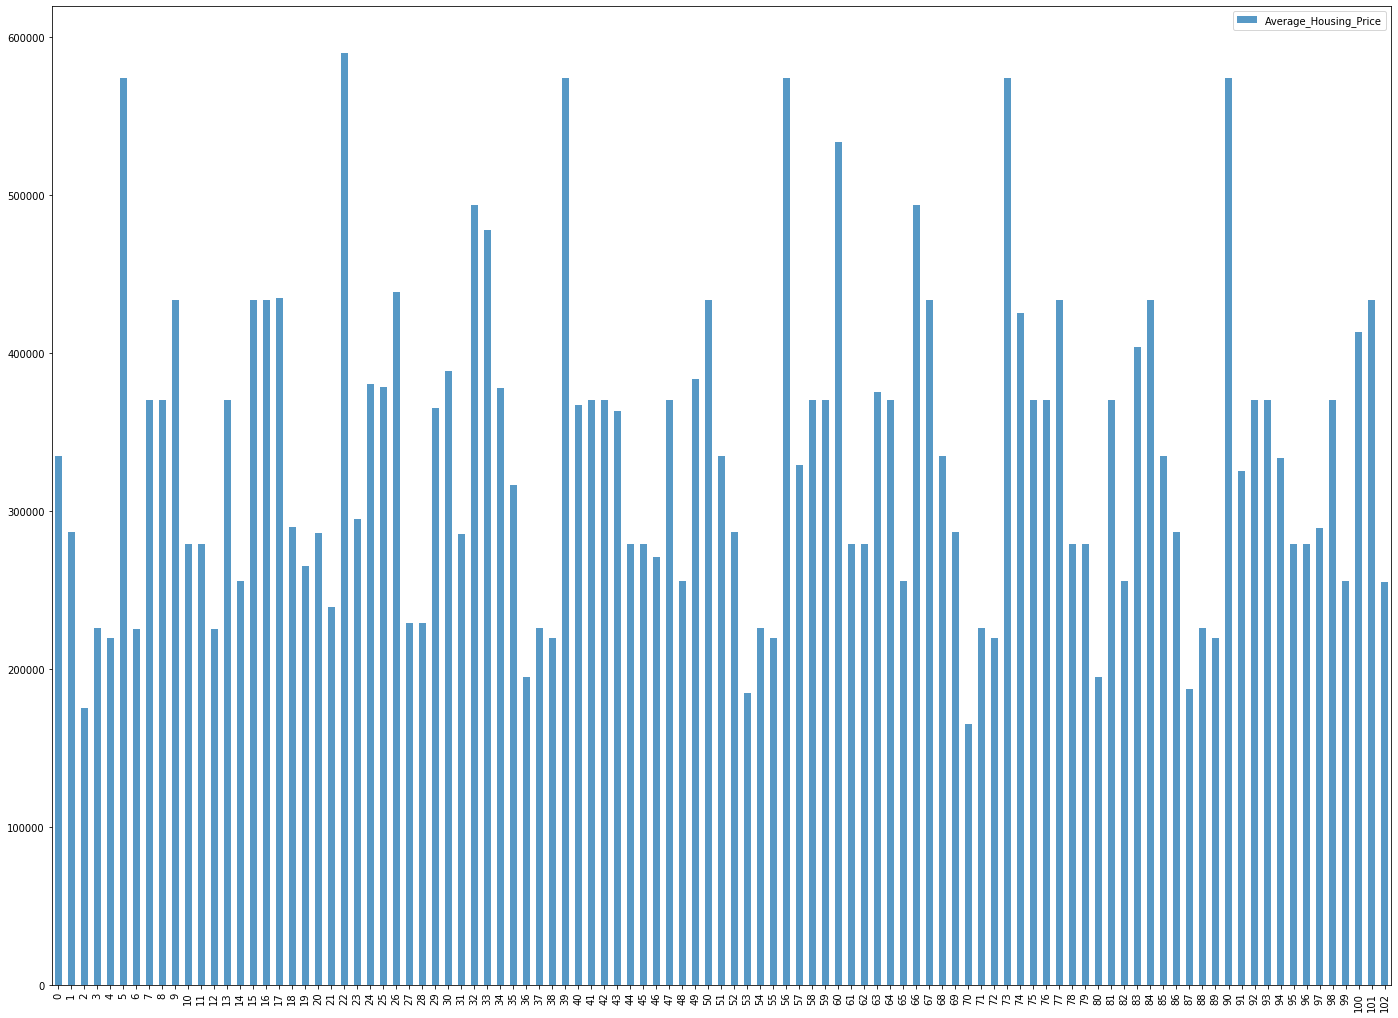

In [46]:
central_toronto_Avg_HousingPrice.plot(kind='bar',figsize=(24,18),alpha=0.75)
central_toronto_Avg_HousingPrice.head()

In [47]:
a=pd.merge(central_toronto_Avg_HousingPrice,central_toronto_merged)

In [48]:
a.head(20)

,Neighbourhood,Average_Housing_Price,Borough,Postal Code,Latitude,Longitude,Coordinates,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Lawrence Park,335000.0,Central Toronto,M4N,43.728020,-79.388790,"(43.7280205, -79.3887901)",2,Business Service,Park,Swim School,Bus Line,Yoga Studio,Dumpling Restaurant,Dive Bar,Dog Run,Doner Restaurant,Donut Shop
1,Davisville North,286600.0,Central Toronto,M4P,43.712751,-79.390197,"(43.7127511, -79.3901975)",1,Pizza Place,Park,Sandwich Place,Café,Dog Run,Dessert Shop,Japanese Restaurant,Taco Place,Sushi Restaurant,Food & Drink Shop
2,"North Toronto West, Lawrence Park",175000.0,Central Toronto,M4R,43.715383,-79.405678,"(43.7153834, -79.40567840000001)",1,Clothing Store,Sporting Goods Shop,Café,Italian Restaurant,Coffee Shop,Restaurant,Diner,Park,Cosmetics Shop,Ramen Restaurant
3,Davisville,225900.0,Central Toronto,M4S,43.704324,-79.388790,"(43.7043244, -79.3887901)",1,Pizza Place,Coffee Shop,Gym,Dessert Shop,Café,Sandwich Place,Italian Restaurant,Tennis Court,Restaurant,Sushi Restaurant
4,"Moore Park, Summerhill East",219400.0,Central Toronto,M4T,43.689574,-79.383160,"(43.6895743, -79.38315990000001)",2,Park,Grocery Store,Thai Restaurant,Gym,Drugstore,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant
5,"Summerhill West, Rathnelly, South Hill, Forest...",573900.0,Central Toronto,M4V,43.686412,-79.400049,"(43.68641229999999, -79.4000493)",1,Coffee Shop,Italian Restaurant,Light Rail Station,Sushi Restaurant,Sandwich Place,Café,Pub,Bagel Shop,Restaurant,Bank
6,Roselawn,225000.0,Central Toronto,M5N,43.711695,-79.416936,"(43.7116948, -79.41693559999999)",1,Health Food Store,Garden,Playground,Pet Store,IT Services,Yoga Studio,Drugstore,Distribution Center,Dive Bar,Dog Run
7,"Forest Hill North & West, Forest Hill Road Park",370500.0,Central Toronto,M5P,43.696948,-79.411307,"(43.6969476, -79.41130720000001)",1,Trail,Sushi Restaurant,Gym / Fitness Center,Jewelry Store,Yoga Studio,Drugstore,Discount Store,Distribution Center,Dive Bar,Dog Run
8,"The Annex, North Midtown, Yorkville",370500.0,Central Toronto,M5R,43.672710,-79.405678,"(43.6727097, -79.40567840000001)",1,Coffee Shop,Pizza Place,Pub,Café,Sandwich Place,Vegetarian / Vegan Restaurant,Grocery Store,Burger Joint,Pharmacy,Diner
9,Rosedale,433500.0,Downtown Toronto,M4W,43.679563,-79.377529,"(43.6795626, -79.37752940000001)",2,Park,Trail,Playground,Yoga Studio,Dumpling Restaurant,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop


# from above dataframe best places are
1. North Toronto West, Lawrence Park-175000.0-Central Toronto
2. Roselawn-225900.0-Central Toronto
3. Davisville-225900.0-Central Toronto